# Shipping Emissions
Share of total CO<sub>2</sub> emissions attributable to maritime bunker fuel, by country by year.

Note that this is a parameterized widget; the specification passed to the API will not be renderable without the geostore identifier being inserted.  

_Author: Peter Kerins_  
_Created: 26 Aug 2021_  
_Environment: jupyterlab_  

## Style
- Vega chart
- Ocean Watch country page - parameterized chart
- Time series
- Line chart

## Data
Underlying dataset: [com.038 Shipping Emissions](https://resourcewatch.carto.com/u/wri-rw/dataset/com_038_rw0_shipping_emissions_edit)  
Widget data: [ow_widget_territory](https://resourcewatch.carto.com/u/wri-rw/dataset/ow_widget_territory) (master table for all territory-based widgets on Ocean Watch)  

## Preparation

In [1]:
import json
from vega import Vega
from IPython.display import display

In [2]:
def Vega(spec):
    bundle = {}
    bundle['application/vnd.vega.v5+json'] = spec
    display(bundle, raw=True)

In [3]:
widget_width = 400
widget_height = 300

# Widget

## Demo Query
`gid_0 = <territory>` used as stand-in for parameterized `geostore_prod={{geostore_id}}`
```sql
SELECT gid_0, name_0, date, value
FROM ow_widget_territory
WHERE widget = 'shipping_emissions'
AND gid_0 = 'CAN'
```

## Parameterized Query
```sql
SELECT data.gid_0, data.name_0, data.date, data.value
FROM ow_widget_territory AS data
LEFT OUTER JOIN gadm36_0 AS gadm ON data.gid_0 = gadm.gid_0
WHERE data.widget = 'shipping_emissions'
AND gadm.geostore_prod={{geostore_id}}
ORDER BY data.date ASC
```

## Specification
Vega code presumes RW-style `config` element present

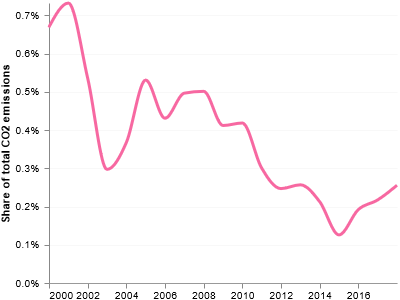

In [4]:
spec=json.loads("""
{
  "schema": "https://vega.github.io/schema/vega/v5.json",
  "description": "Share of national/territorial CO2 emissions due to maritime bunker fuels",
  "width": 400,
  "height": 250,
  "padding": 0,
  "autosize": {"type": "fit", "contains": "padding"},
  "signals": [],
  "data": [
    {
      "name": "table",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT gid_0, name_0, date, value/100.0 AS value FROM ow_widget_territory WHERE widget = 'shipping_emissions' AND gid_0 = 'CAN'",
      "format": {
        "type": "json",
        "property": "rows",
        "parse": {"date": "utc:'%Y-%m-%d'"}
      },
      "transform": []
    }
  ],
  "scales": [
    {
      "name": "datescale",
      "type": "time",
      "domain": {"data": "table", "field": "date"},
      "range": "width"
    },
    {
      "name": "yscale",
      "type": "linear",
      "domain": {
        "data": "table", 
        "fields": ["value"]
      },
      "range": "height",
      "padding": 0.1
    }
  ],
  "axes": [
    {
      "orient": "bottom",
      "scale": "datescale",
      "domain": true,
      "labelFlush": true,
      "labelOverlap": true,
      "labelBaseline": "middle",
      "ticks": true,
      "grid": false,
      "labelFontSize": 10,
      "labelFont": "Arial",
      "labelPadding": 7
    },
    {
      "orient": "left",
      "scale": "yscale",
      "domain": true,
      "labelBaseline": "middle",
      "labelAlign": "right",
      "labelPadding": 5,
      "grid": true,
      "gridOpacity": 0.2,
      "labelFontSize": 10,
      "labelFont": "Arial",
      "format": ".1%",
      "title": "Share of total CO2 emissions"
    }
  ],
  "marks": [
    {
      "type": "line",
      "from": {"data": "table"},
      "encode": {
        "enter": {
          "x": {"scale": "datescale", "field": "date"},
          "y": {"scale": "yscale", "field": "value"},
          "stroke": {"value": "#f768a1"},
          "strokeWidth": {"value": 3},
          "interpolate": {"value": "monotone"},
          "tooltip": {
            "signal": "{'Year':utcFormat(datum.date,'%Y'), 'Share of emissions':format(datum.value,'.1%')}"
          }
        },
        "update": {
          "strokeOpacity": {"value": 1}
        },
        "hover": {
          "strokeOpacity": {"value": 0.5}
        }
      }
    }
  ],
  "legends": [
  ]
}
""")
vega_view=dict(spec)
vega_view['width']=widget_width
vega_view['height']=widget_height
Vega(vega_view)

# RW API

Parameterized widgets created via [widget scripts](https://github.com/resource-watch/data-team-tools/tree/master/advanced_widget_writer).  

[com.038.rw0 Shipping Emissions](https://resourcewatch.org/data/explore/c9937085-22ec-4f8c-b819-5fa02473abdb) ([Admin](https://resourcewatch.org/admin/data/datasets/c9937085-22ec-4f8c-b819-5fa02473abdb/edit))  
`c9937085-22ec-4f8c-b819-5fa02473abdb`  
[Dataset](https://api.resourcewatch.org/v1/dataset/c9937085-22ec-4f8c-b819-5fa02473abdb/), [Widgets](https://api.resourcewatch.org/v1/dataset/c9937085-22ec-4f8c-b819-5fa02473abdb/widget)

In [6]:
dataset_id = 'c9937085-22ec-4f8c-b819-5fa02473abdb'
name = 'Shipping Emissions'
description = 'Share of national/territorial CO2 emissions due to maritime bunker fuels'

- [Country](https://api.resourcewatch.org/v1/widget/830f2880-527c-4272-8aaf-8ff8d87a83a8?env=production) `830f2880-527c-4272-8aaf-8ff8d87a83a8`  